# **Proyecto Procesamiento del Lenguaje Natural**
## Daniel de Jesús Romero Ibarra
Seminario de Estructura de Datos II

In [3]:
import json
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Recuperación de registros desde un archivo 'json'
archivo_json = "/content/drive/MyDrive/Proyecto_SEDAII/data_query.json"

with open(archivo_json) as archivo:
  datos = json.load(archivo)
print(len(datos))

22


#***Caso 1. Visualización de frecuencia de palabras y nube de palabras.***


In [ ]:
# Generar el Diccionario
diccionario = {}

for valores in datos.values():
  for palabras in valores:
    palabras = palabras.replace('?', '').replace('¿', '').replace('.', '').replace('—', '').replace('!', '').replace('¡', '').replace('“', '')
    palabras = palabras.replace('”', '').replace('}', '').replace("'", '')
    palabras = palabras.split()
    for palabra in palabras:
      if (palabra in diccionario):
        diccionario[palabra] += 1
      else:
        diccionario[palabra] = 1

print("Frecuencia de palabras: ", diccionario)

Frecuencia de palabras:  {'python': 412, 'tutorial': 37, 'coalicion': 1, 'hagamos': 1, 'inteligencia': 7, 'cambio': 2, 'robot': 1, 'sesgo': 1, 'tweet': 1, 'dev': 7, 'min': 1, 'xam': 1, 'wamp': 1, 'sublime': 3, 'db': 1, 'sql': 1, 'LUA': 1, 'lenguaje': 40, 'matemáticas': 6, 'iwoz': 2, 'tubos': 1, 'digita': 1, 'wikil': 2, 'amazon': 2, 'fantasma': 1, 'ecologica': 1, 'metafora': 1, 'photoshop': 8, 'java': 37, 'matplot': 1, 'c++': 100, 'fotonica': 10, 'Lee': 1, 'Minsky': 1, 'filosofía': 3, 'pythoon': 1, 'programacion': 99, 'libro': 10, 'WikiLeaks': 12, 'Assange': 4, 'Python': 167, 'Doing': 1, 'C': 20, 'matematicas': 25, 'seguridad': 7, 'keras': 2, 'neuronales': 6, '0914153277': 1, '9500824663': 1, '471048852': 1, '8499647383': 2, 'Lego': 2, 'LEGO': 1, 'WOZ': 2, 'abaco': 1, 'newman': 1, 'antonio': 1, 'von': 1, 'pandas': 30, 'Latinity': 3, 'Redes': 2, 'https://wdgbiblioudgmx/': 1, 'wdg': 1, 'https://docspythonorg/es/3/tutorial/moduleshtml': 1, 'modulo': 1, '6': 2, 'LATINITY': 1, '2019:': 1, 'L

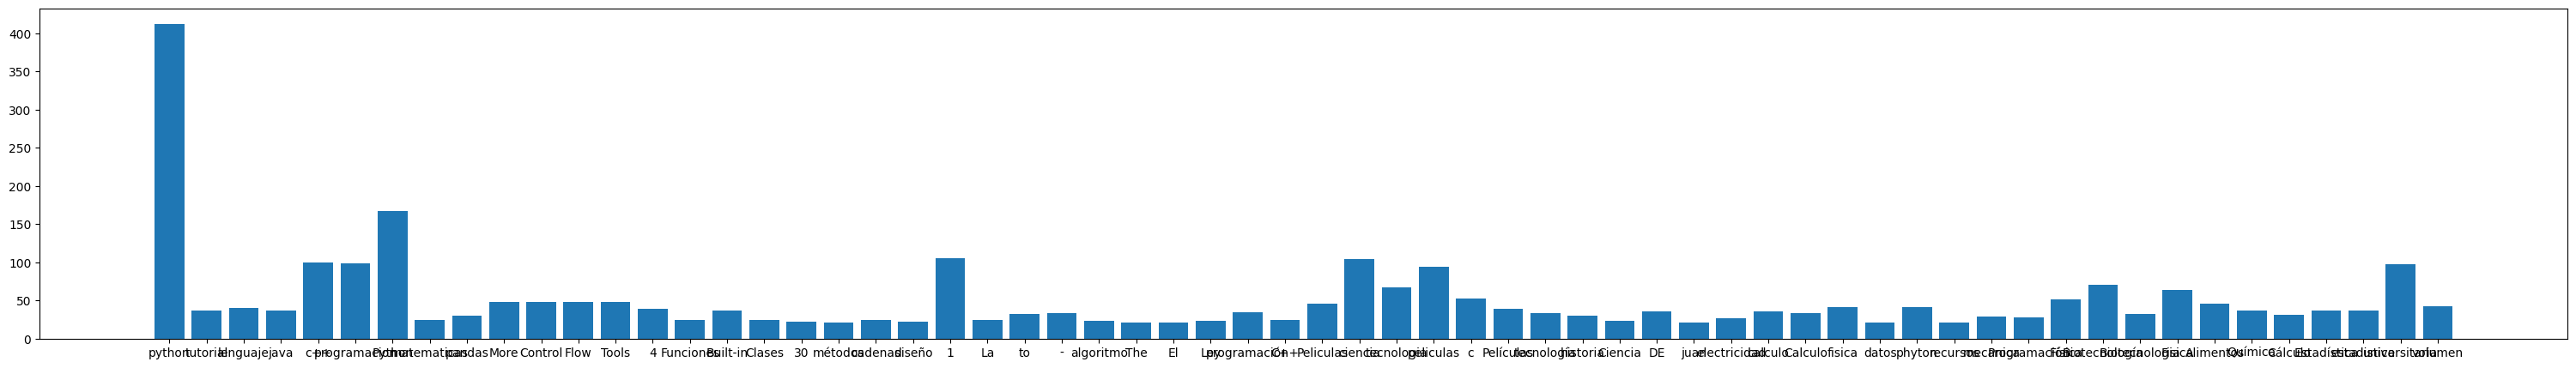

In [ ]:
import matplotlib.pyplot as plt
# Datos Rescatados
diccionario_filtrado = {clave: valor for clave, valor in diccionario.items() if valor > 20}

palabras = diccionario_filtrado.values()
cantidades = diccionario_filtrado.keys()

#Generar la grafica
fig, ax = plt.subplots(figsize = (38,5))
ax.bar(cantidades, palabras)
plt.show()

In [ ]:
!pip install matplotlib wordcloud # Paquete para generar la nube

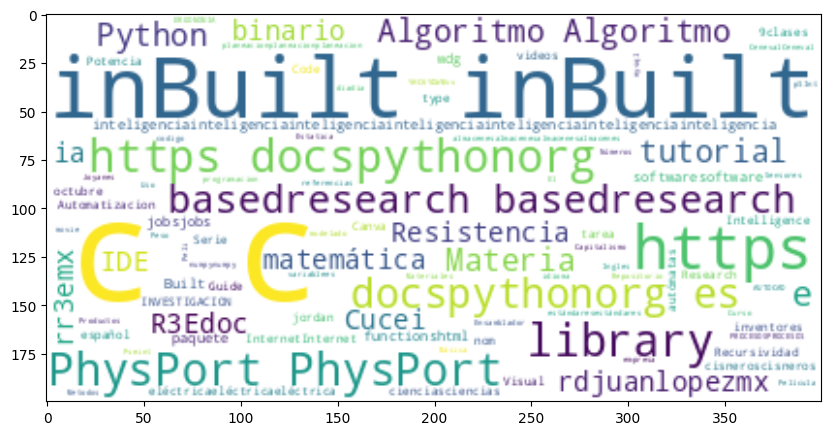

In [ ]:
# Generar la nube de palabras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texto = ' '.join([palabra * frecuencia for frecuencia, palabra in diccionario.items()])
# Crear la nube de palabras
wordcloud = WordCloud(width=400, height=200, background_color='white').generate(texto)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.4 MB/s eta 0:00:00


In [ ]:
from spellchecker import SpellChecker # SpellChecker permite revisar la ortografía de las palabras y proponer correcciones
                                      # Usa el algoritmo de levenshtein, mismo el cual no pude integrar :/
espan = SpellChecker(language='es')
errores_es = espan.unknown(diccionario.keys())
# print("Errores: ", errores_es)

# Diccionario para almacenar correcciones
correcciones = {}

# Iterar sobre errores en español
for palabra_es in errores_es:
    correccion_es = espan.correction(palabra_es)
    correcciones[correccion_es] = correcciones.get(correccion_es, []) + [palabra_es]
print(correcciones)

{'programación': ['programaación', 'prpgramacion', 'programacion'], None: ['conceptualización', 'https://rr3emx/yqnjecjxzn', 'https://wdgbiblioudgmx/', 'powerworld', 'antropometria', 'capaacitancia', 'pseucodigo', '2019:', 'dataframes', 'quickstart', 'javascript', 'labview', 'pythoon', 'assessment', 'chemistry', 'ttps://rdjuanlopezmx/yhc6ydwmvv', 'socreative', 'matplotlib', 'bocetosgeometrico', 'https://phetcoloradoedu/es/', 'agreement', 'euclides', 'radiometry', '´python', 'http://esgravatarcom', 'probabestadística', 'pokaypke', 'beginner', 'raspberry', 'c+++', 'multilenguaje', 'built-in', 'intro_to_latex', 'stability', 'overshoot', 'sinonimía', 'python¶', 'eratostenes', 'electromagn', 'realpython', 'discrete-event', 'strucutre', 'saint-exupéry', 'datetime', 'pandapower', 'repocucei', 'i5897', 'trigonométricas', 'javascrpt', 'miniconda', 'fibonacci', 'https://rdjuanlopezmx/', 'beginners', 'codeblocks', 'wallstreet', 'javascripot', 'bioinformática', 'graphical', 'recursividad', 'progra

In [ ]:
# Esto es más una deducción. Si obtuve None (Es decir, que no se encontró corrección) despues de corregir en español.
# es probable que haya palabras en inglés que puedan corregirse.

if None in correcciones:
  ingles = SpellChecker()
  mis = ingles.unknown(correcciones[None])

  for w in mis:
    c = ingles.correction(w)
    correcciones[c] = correcciones.get(c, []) + [w] # añade la corrección al diccionario

print(correcciones)

{'programación': ['programaación', 'prpgramacion', 'programacion'], None: ['conceptualización', 'https://rr3emx/yqnjecjxzn', 'https://wdgbiblioudgmx/', 'powerworld', 'antropometria', 'capaacitancia', 'pseucodigo', '2019:', 'dataframes', 'quickstart', 'javascript', 'labview', 'pythoon', 'assessment', 'chemistry', 'ttps://rdjuanlopezmx/yhc6ydwmvv', 'socreative', 'matplotlib', 'bocetosgeometrico', 'https://phetcoloradoedu/es/', 'agreement', 'euclides', 'radiometry', '´python', 'http://esgravatarcom', 'probabestadística', 'pokaypke', 'beginner', 'raspberry', 'c+++', 'multilenguaje', 'built-in', 'intro_to_latex', 'stability', 'overshoot', 'sinonimía', 'python¶', 'eratostenes', 'electromagn', 'realpython', 'discrete-event', 'strucutre', 'saint-exupéry', 'datetime', 'pandapower', 'repocucei', 'i5897', 'trigonométricas', 'javascrpt', 'miniconda', 'fibonacci', 'https://rdjuanlopezmx/', 'beginners', 'codeblocks', 'wallstreet', 'javascripot', 'bioinformática', 'graphical', 'recursividad', 'progra

In [ ]:
print(correcciones["python"])

['pythoon', 'qpython', '´python', 'pytjhon', 'python¶']


In [ ]:
# Algunas correcciones erroneas
del correcciones["pilot"]
del correcciones['a']
del correcciones["boone"]
del correcciones['acosadores']
del correcciones['cuchi']
del correcciones['minino']
del correcciones['peyton']
del correcciones["huele"]
del correcciones["muriera"]
del correcciones["d"]
del correcciones["rockstar"]
del correcciones["autocar"]
del correcciones["ex"]
del correcciones["polly"]
del correcciones["turn"]
del correcciones["con"]
del correcciones["pégame"]

In [ ]:
# Diccionarios de N-gramas

import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def diccionario_ngramas(palabras_n, n):
    # Tokeniza el texto en palabras
    palabras = palabras_n.lower().split()

    # Crea una lista de ngramas
    ngramas = list(ngrams(palabras, n))

    relaciones = {}
    for i in range(len(ngramas) - 1):
        # Asigna el ngrama correspondiente a la palabra
        relaciones[palabras[i]] = ngramas[i]

    return relaciones

In [ ]:
palabras_n = str(datos.values()) # Obtener las palabras y hacerlas string para tokenizar después

# Relacionar palabras con ngramas
bigramas = diccionario_ngramas(palabras_n, n=2)
trigramas = diccionario_ngramas(palabras_n, n=3)
cuatro = diccionario_ngramas(palabras_n, n=4)

print(bigramas)
print(trigramas)
print(cuatro)

{"dict_values([['python": ("dict_values([['python", 'tutorial'), 'tutorial': ('tutorial', 'instalacion'), 'python': ('python', 'programacion'), 'coalicion': ('coalicion', 'hagamos'), 'hagamos': ('hagamos', 'inteligencia'), 'inteligencia': ('inteligencia', 'emocional'), 'cambio': ('cambio', 'climático'), 'robot': ('robot', 'sesgo'), 'sesgo': ('sesgo', 'tweet'), 'tweet': ('tweet', 'dev'), 'dev': ('dev', 'seaborn'), 'min': ('min', 'xam'), 'xam': ('xam', 'wamp'), 'wamp': ('wamp', 'sublime'), 'sublime': ('sublime', 'wikileaks'), 'db': ('db', 'sql'), 'sql': ('sql', 'lua'), 'lua': ('lua', 'lenguaje'), 'lenguaje': ('lenguaje', 'c'), 'matemáticas': ('matemáticas', 'aplicadas'), 'iwoz': ('iwoz', 'c'), 'tubos': ('tubos', 'iwoz'), 'digita': ('digita', 'wikil'), 'wikil': ('wikil', 'ecologica'), 'amazon': ('amazon', 'wikil'), 'fantasma': ('fantasma', 'amazon'), 'ecologica': ('ecologica', 'python'), 'metafora': ('metafora', 'photoshop'), 'photoshop': ('photoshop', 'diseño'), 'java': ('java', "',"), '

In [ ]:
# Nuevo Diccionario de frecuencias
from collections import defaultdict

frecuencias_dic = defaultdict(int)

for correccion, errores in correcciones.items():
    frecuencias_dic[correccion] += len(errores)

print(frecuencias_dic)

defaultdict(<class 'int'>, {'programación': 3, None: 251, 'ecológica': 2, 'documentación': 1, 'warp': 1, 'fotónicos': 1, 'ido': 1, 'mapa': 2, 'puzzle': 1, 'neumática': 1, 'anya': 1, 'wiki': 1, 'diseño': 1, 'falta': 1, 'inferencia': 1, 'point': 1, 'simple': 1, 'mecanico': 1, 'programa': 3, 'recursos': 2, 'ingente': 1, 'barco': 1, 'ópticas': 1, 'carne': 1, 'trols': 1, 'volumen': 1, 'job': 1, 'robo': 1, 'evaluación': 1, 'logica': 1, 'starling': 1, 'sabor': 1, 'state': 1, 'cata': 1, 'biomédica': 1, 'comunicación': 1, 'mecanica': 3, 'abajo': 1, 'pershing': 1, 'rising': 1, 'udes': 1, 'forma': 1, 'te': 1, 'apple': 1, 'topes': 2, 'we': 1, 'algoritmo': 5, 'laboratorio': 1, 'ergonomía': 1, 'matemáticos': 1, 'alejandro': 1, 'optimizar': 1, 'nivel': 1, 'tinte': 1, 'barata': 1, 'ud': 1, 'charlie': 1, 'basico': 2, 'peyman': 2, 'ecuaciones': 2, 'verlo': 1, 'definición': 1, 'natal': 1, 'piba': 1, 'termodinámica': 4, 'hook': 1, 'dia': 1, 'ordenamiento': 1, 'inicio': 1, 'poison': 1, 'librarse': 1, 'asig

In [ ]:
nltk.download('stopwords')
# Uso de la librería NLTK para invocar un diccionario
# de Stopwords en Español predefinido
stop_words = nltk.corpus.stopwords.words('spanish')
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Eliminar StopWords
nuevo_dic_sin_stopwords = {}

for palabra, frecuencia in frecuencias_dic.items():
    if palabra is not None:
      if palabra.lower() not in stop_words:
          nuevo_dic_sin_stopwords[palabra] = frecuencia

for v in nuevo_dic_sin_stopwords.values():
  if(v > 1):
    print(v)

tokens_totales = sum(frecuencias_dic.values())
tokens_unicos = len(frecuencias_dic)

# Imprimir resultados
print("Total de tokens en el diccionario de frecuencias:", tokens_totales)
print("Total de tokens únicos en el diccionario de frecuencias:", tokens_unicos)

3
2
2
3
2
3
2
5
2
2
2
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
5
2
Total de tokens en el diccionario de frecuencias: 723
Total de tokens únicos en el diccionario de frecuencias: 420


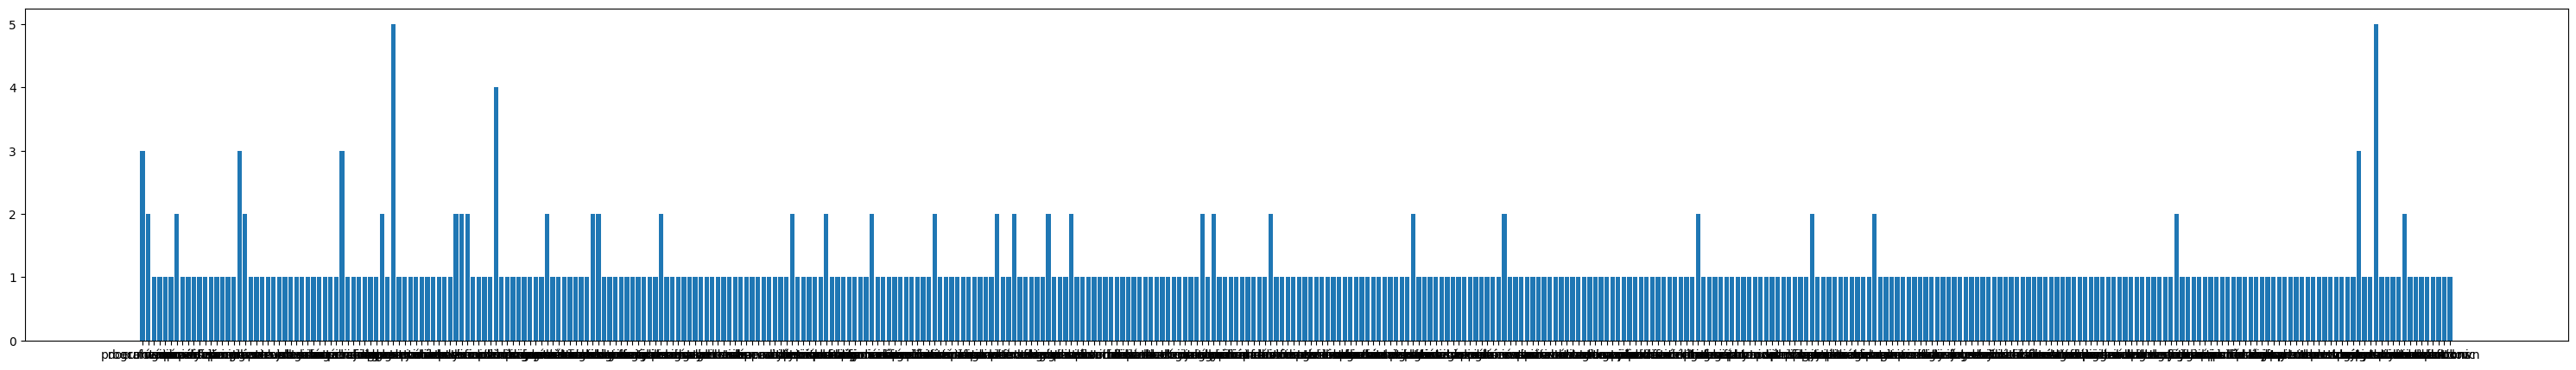

In [ ]:
# Grafica de frecuencias en el diccionario
import matplotlib.pyplot as plt
# Datos Rescatados
nuevo_dic_sin_stopwords = {clave: valor for clave, valor in nuevo_dic_sin_stopwords.items()}

v = nuevo_dic_sin_stopwords.values()
c = nuevo_dic_sin_stopwords.keys()

#Generar la grafica
fig, ax = plt.subplots(figsize = (38,5))
ax.bar(c, v)
plt.show()

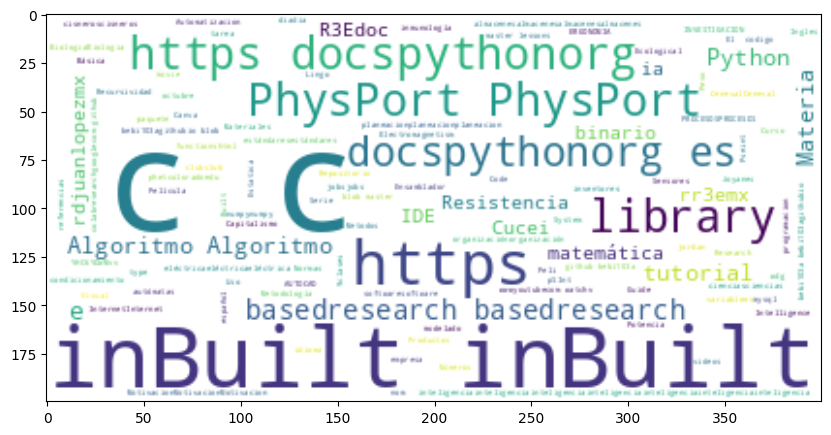

In [ ]:
# Generar la nueva nube
t = ' '.join([palabra * frecuencia for frecuencia, palabra in nuevo_dic_sin_stopwords.items()])
# Crear la nube de palabras
wordcloud = WordCloud(width=400, height=200, background_color='white').generate(texto)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#Conclusión Caso 1
Prometo cuidar mi ortografía, apartir de ahora.
Pues es crucial que se cuiden las palabras ya que un error ortografico puede darle un sentido completamente distinto al texto afectando su comprensión, un ejemplo claro que pude observar fue la sustitución o mantener los asentos en su defecto, en particular una palabra contenía un asento erróneo ("´Python"), si decidía eliminar los asentos para tomar esa palabra, entonces el resto de palabras perderían en gran medida el significado de las mismas a su vez aumentando la cantidad de palabras erróneas que después tendría que corregir, si lo hice solo para ese caso pero no niego que podrían haber palabras con errores similares que no pude observar.

Ahora una de las partes que considero más interesantes son la corrección ortográfica y los N-grams, primero intenté implementar el algoritmo o distancia de Levenshtein, también noté que los errores ortograficos no solo estaban en palabras en español, por lo que implementé un filtrado extra para esas palabras.

La identificación de N-grams, es esencial para comprender la estructura y la relación entre las palabras en un texto. La frecuencia de 'n-gramas' puede revelar patrones específicos que podrían ser relevantes en la comprensión del contexto, además a través de estos patrones tambien nos permite (por medio de un modelo) una predicción de la siguiente palabra.

In [ ]:
# Guardar los cambios hechos en el archivo JSON
import json
file_json = '/content/drive/MyDrive/Proyecto_SEDAII/diccionario_correcion_ortografica.json'
file_json_ngrams = '/content/drive/MyDrive/Proyecto_SEDAII/ngrams.json'

with open(file_json, 'w') as fp:
    json.dump(nuevo_dic_sin_stopwords, fp)

with open(file_json_ngrams, 'w') as fp:
    json.dump(bigramas, fp)

with open(file_json, 'r') as fp:
    data = json.load(fp)

with open(file_json_ngrams, 'r') as fp:
    datngram = json.load(fp)

print(datngram)
print(data)

{"dict_values([['python": ["dict_values([['python", 'tutorial'], 'tutorial': ['tutorial', 'instalacion'], 'python': ['python', 'programacion'], 'coalicion': ['coalicion', 'hagamos'], 'hagamos': ['hagamos', 'inteligencia'], 'inteligencia': ['inteligencia', 'emocional'], 'cambio': ['cambio', 'climático'], 'robot': ['robot', 'sesgo'], 'sesgo': ['sesgo', 'tweet'], 'tweet': ['tweet', 'dev'], 'dev': ['dev', 'seaborn'], 'min': ['min', 'xam'], 'xam': ['xam', 'wamp'], 'wamp': ['wamp', 'sublime'], 'sublime': ['sublime', 'wikileaks'], 'db': ['db', 'sql'], 'sql': ['sql', 'lua'], 'lua': ['lua', 'lenguaje'], 'lenguaje': ['lenguaje', 'c'], 'matemáticas': ['matemáticas', 'aplicadas'], 'iwoz': ['iwoz', 'c'], 'tubos': ['tubos', 'iwoz'], 'digita': ['digita', 'wikil'], 'wikil': ['wikil', 'ecologica'], 'amazon': ['amazon', 'wikil'], 'fantasma': ['fantasma', 'amazon'], 'ecologica': ['ecologica', 'python'], 'metafora': ['metafora', 'photoshop'], 'photoshop': ['photoshop', 'diseño'], 'java': ['java', "',"], '

#***CASO 2 Visualización de frecuencia de palabras y nube de palabras. (Por carrera)***


In [ ]:
carreras = ["Licenciatura en Ingeniería en Computación (CUCEI)",
            "Ingeniería en Computación (CUCEI)",
            "Licenciatura en Ingeniería en Comunicaciones y Electrónica (CUCEI)",
            "Licenciatura en Informática (CUCEI)",
            "Ingeniería Informática (CUCEI)",
            "Licenciatura en Ingeniería Mecánica Eléctrica (CUCEI)",
            "Ingeniería Mecánica Eléctrica (CUCEI)",
            "Ingeniería Industrial (CUCEI)",
            "Licenciatura en Ingeniería Industrial (CUCEI)",
            "Ingenieria Fotónica (CUCEI)",
            "Licenciatura en Diseño para la Comunicación Gráfica (CUAAD)",
            "Ingeniería Biomédica (CUCEI)",
            "Ingeniería en Logística y Transporte (CUCEI)",
            "Licenciatura en Ingeniería Química (CUCEI)",
            "Licenciatura en Física (CUCEI)",
            "Ingeniería Química (CUCEI)",
            "Licenciatura en Químico Farmacobiólogo (CUCEI)",
            "Licenciatura en Química (CUCEI)",
            "Licenciatura en Ingeniería en Alimentos y Biotecnología (CUCEI)",
            "Licenciatura en Ingeniería Biomédica (CUCEI)",
            "Ingenieria en Computación (ITAM)",
            "Carrera sin definir"]

dic_carreras = {}
# Crea en diccionario de frecuencias por carrera
for indice, valor in enumerate(carreras):
  if str(indice) in datos.keys():
    dic_carreras[valor] = datos[str(indice)]

# Datos que opté por usar, basandome en la longitud de frecuencias.
#for carrera, frecpala in dic_carreras.items():
  #if(len(frecpala) > 20):
    #print(len(dic_carreras[carrera]))

devueltaAlBasureroAlBasurero = [clave for clave, valor in dic_carreras.items() if len(valor) < 20]
for clave in devueltaAlBasureroAlBasurero:
    del dic_carreras[clave]
print(len(dic_carreras.keys()))

8


In [ ]:
print(dic_carreras)

{'Licenciatura en Ingeniería en Computación (CUCEI)': ['python tutorial python coalicion hagamos inteligencia inteligencia cambio robot sesgo tweet dev min xam wamp sublime db sql LUA lenguaje matemáticas iwoz tubos iwoz digita wikil amazon fantasma amazon wikil ecologica python metafora photoshop photoshop python python python java matplot python python python c++ fotonica Lee Minsky python python python python python python python python python python python filosofía filosofía filosofía pythoon python programacion libro WikiLeaks Assange WikiLeaks Assange WikiLeaks WikiLeaks Assange python WikiLeaks python WikiLeaks WikiLeaks python WikiLeaks WikiLeaks Python python sublime WikiLeaks Doing sublime WikiLeaks WikiLeaks Assange Python C matematicas seguridad seguridad keras neuronales 0914153277 9500824663 471048852 8499647383 8499647383 Lego LEGO WOZ WOZ Lego abaco newman antonio von python python python pandas python python Latinity python python python python python python python py

In [ ]:
# Itera sobre cada carrera y su lista de palabras
frecuencia_palabras = {}
for carrera, palabras in dic_carreras.items():
    # Si la carrera no está en el diccionario de frecuencia, agrégala con un diccionario vacío
    if carrera not in frecuencia_palabras:
        frecuencia_palabras[carrera] = {}

    # Para cada palabra en la lista
    for palabra in palabras:
        # Limpia la palabra
        palabra = palabra.replace('?', '').replace('¿', '').replace('.', '').replace('—', '').replace('!', '').replace('¡', '').replace('“', '')
        palabra = palabra.replace('”', '').replace('}', '').replace("'", '')
        # Divide la palabra en caso de que haya varias palabras en una
        palabras_limpias = palabra.split()
        # Itera sobre cada palabra limpia
        for palabra_limpia in palabras_limpias:
            # Verifica si la palabra ya está en el diccionario de frecuencia
            if palabra_limpia in frecuencia_palabras[carrera]:
                # Si está presente, incrementa la cuenta para esa palabra y carrera
                frecuencia_palabras[carrera][palabra_limpia] += 1
            else:
                frecuencia_palabras[carrera][palabra_limpia] = 1
print(frecuencia_palabras)

{'Licenciatura en Ingeniería en Computación (CUCEI)': {'python': 133, 'tutorial': 12, 'coalicion': 1, 'hagamos': 1, 'inteligencia': 2, 'cambio': 1, 'robot': 1, 'sesgo': 1, 'tweet': 1, 'dev': 1, 'min': 1, 'xam': 1, 'wamp': 1, 'sublime': 3, 'db': 1, 'sql': 1, 'LUA': 1, 'lenguaje': 24, 'matemáticas': 1, 'iwoz': 2, 'tubos': 1, 'digita': 1, 'wikil': 2, 'amazon': 2, 'fantasma': 1, 'ecologica': 1, 'metafora': 1, 'photoshop': 2, 'java': 5, 'matplot': 1, 'c++': 21, 'fotonica': 1, 'Lee': 1, 'Minsky': 1, 'filosofía': 3, 'pythoon': 1, 'programacion': 7, 'libro': 2, 'WikiLeaks': 12, 'Assange': 4, 'Python': 50, 'Doing': 1, 'C': 11, 'matematicas': 3, 'seguridad': 2, 'keras': 2, 'neuronales': 2, '0914153277': 1, '9500824663': 1, '471048852': 1, '8499647383': 2, 'Lego': 2, 'LEGO': 1, 'WOZ': 2, 'abaco': 1, 'newman': 1, 'antonio': 1, 'von': 1, 'pandas': 3, 'Latinity': 3, 'Redes': 2, 'https://wdgbiblioudgmx/': 1, 'wdg': 1, 'https://docspythonorg/es/3/tutorial/moduleshtml': 1, 'modulo': 1, '6': 2, 'LATINIT

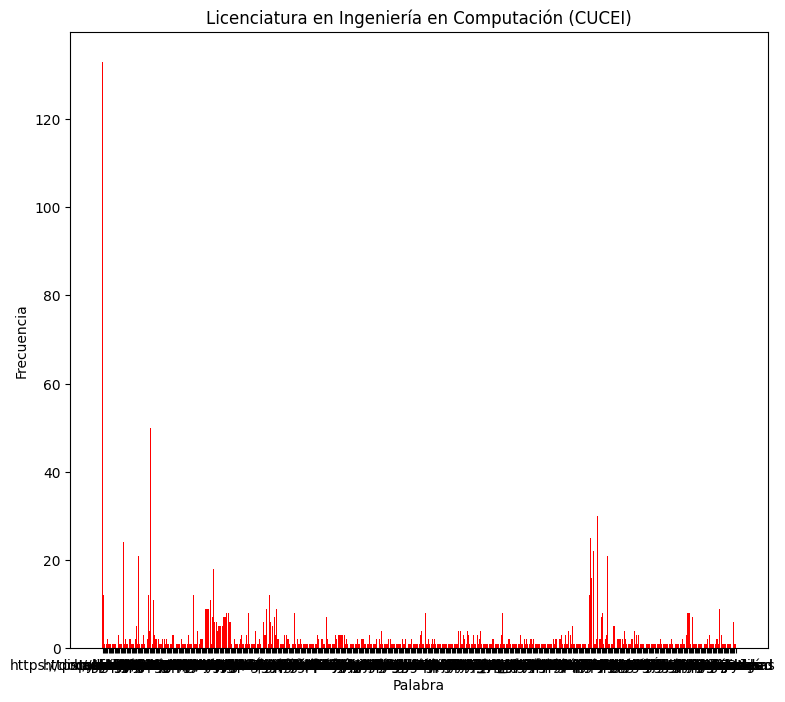

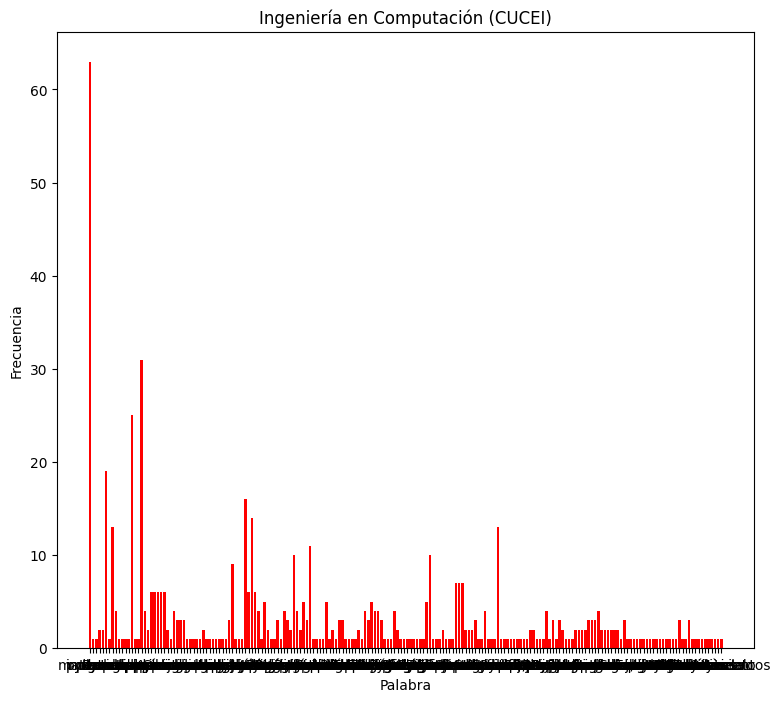

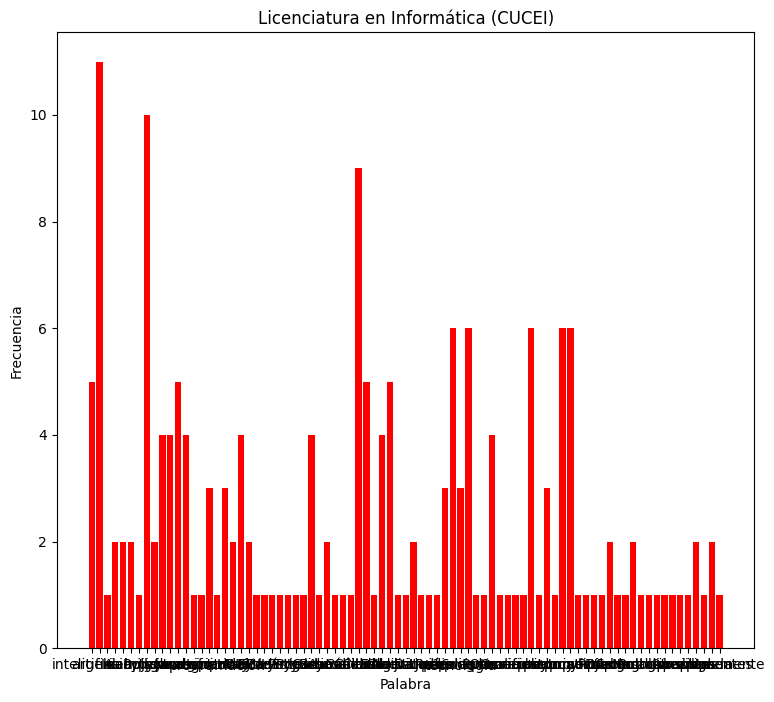

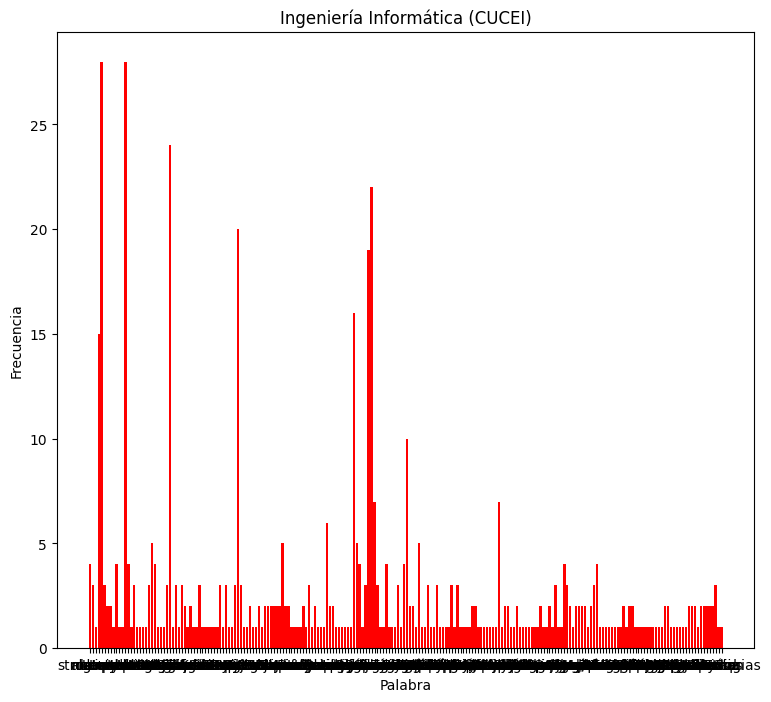

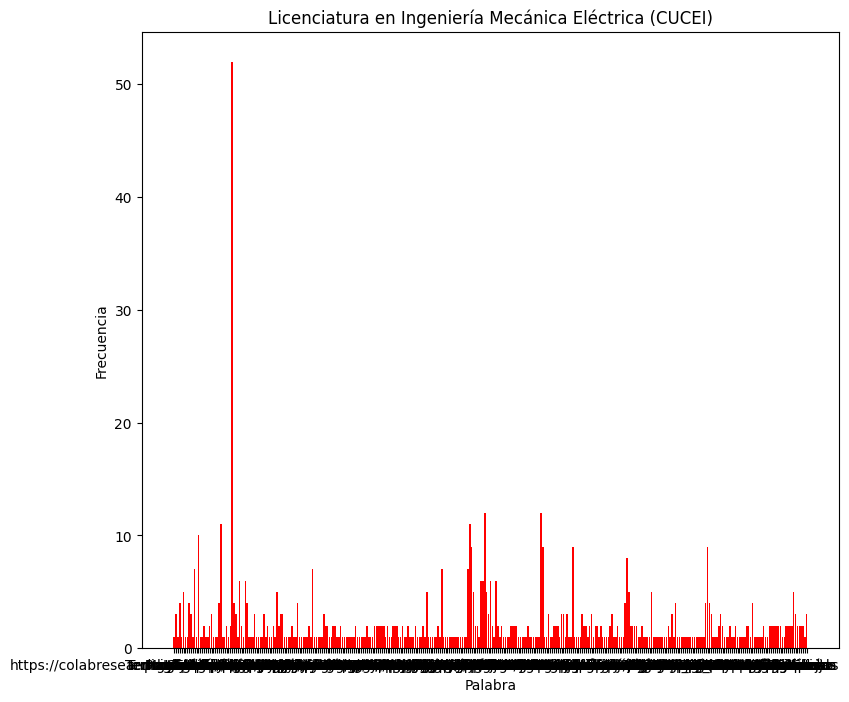

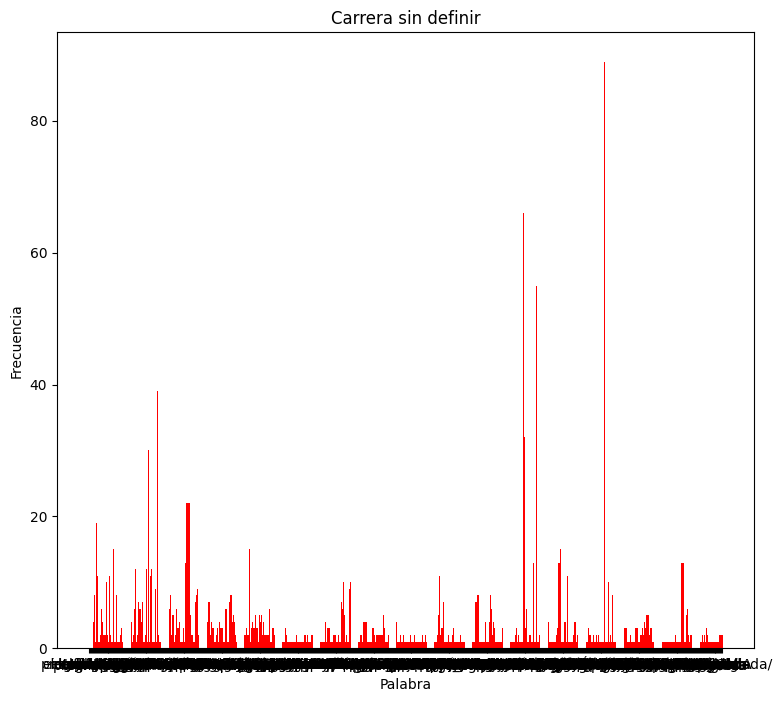

In [ ]:
import matplotlib.pyplot as plt

def graficas(frecuencia_palabras):
    for carrera, frecuencias in frecuencia_palabras.items():
        palabras = list(frecuencias.keys())
        frecuencias = list(frecuencias.values())

        plt.figure(figsize=(9, 8))
        plt.bar(palabras, frecuencias, color='red')
        plt.title(carrera)
        plt.xlabel("Palabra")
        plt.ylabel("Frecuencia")
        plt.show()

graficas(frecuencia_palabras)


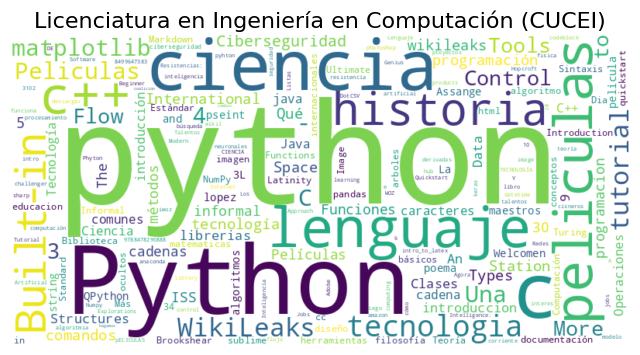

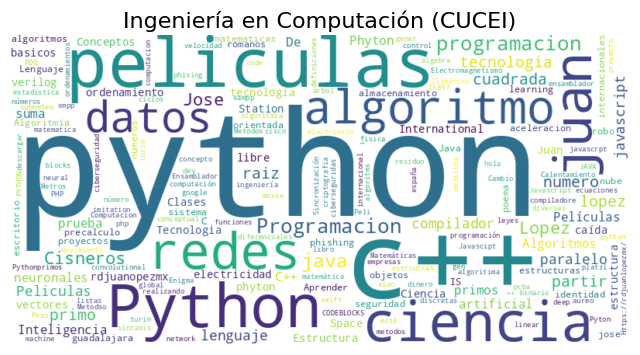

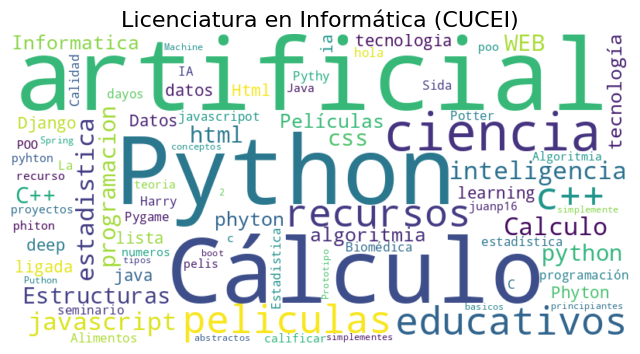

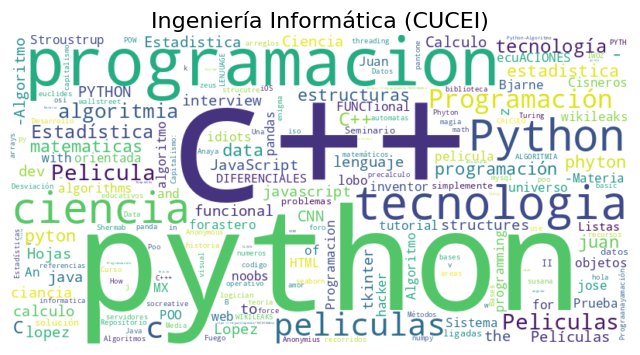

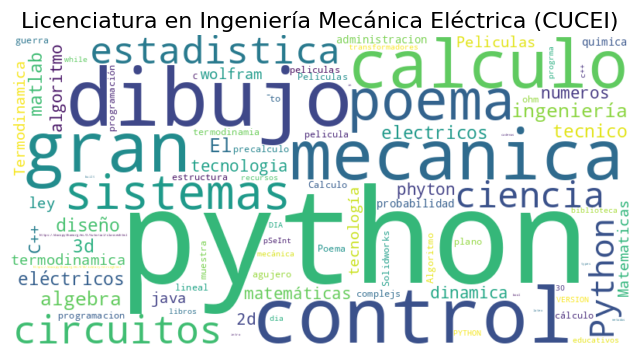

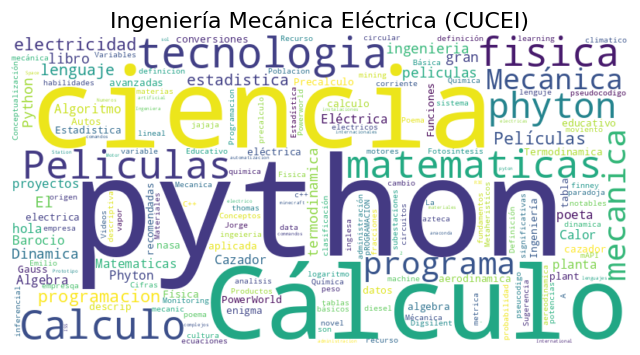

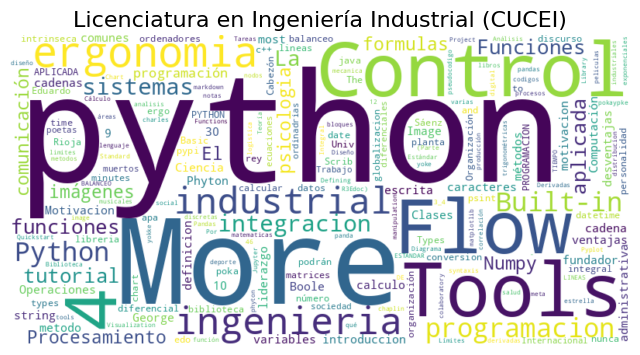

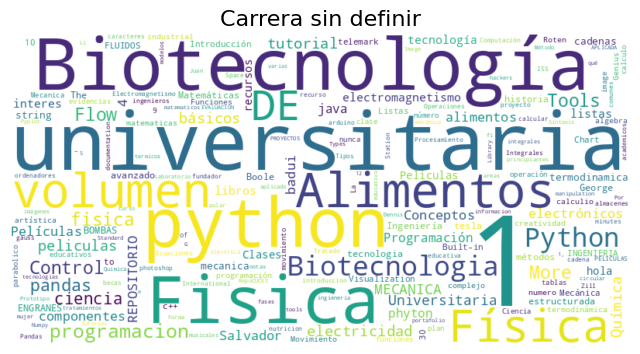

In [ ]:
# Ahora al fin, nubes de palabras

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generar_nube_palabras(frecuencias, carrera):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencias)

    plt.figure(figsize=(8, 6))
    plt.title(carrera, fontsize=16)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Desactivar los ejes
    plt.show()


for carrera in frecuencia_palabras.keys():
  generar_nube_palabras(frecuencia_palabras[carrera], carrera)


##***Conclusión Caso 2***
Fue muy curioso observar las palabras que más se repiten por carrera, y como la gráfica y datos indican, la carrera que mayor frecuencia tiene en los datos es Licenciatura en Ingeniería en Computación.
Decidí usar aquellos valores que fueran mayores a una longitud de valores en el diccionario mayor que 8, sin embargo eso implicó tener aún más datos de carreras, qué además quizá de poco nos servirían. Alguna idea que se me ocurre es un modelo que en base a datos como estos pemita otorgar mejores recomendaciones en base a la carrera que cursa el usuario.


#***CASO 3. Generación de matrices de características***


In [35]:
# Importar el núcleo de trabajo en Español
import spacy.cli

# Se carga núcleo de trabajo (Español)
spacy.cli.download("es_core_news_sm")
nlp_es = spacy.load("es_core_news_sm")

doc = nlp_es('autor')
token = doc[0]
print(token.text, token.pos_)

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
autor NOUN


In [72]:
archivo_json = "/content/drive/MyDrive/Proyecto_SEDAII/data_query.json"

with open(archivo_json) as archivo:
  datos = json.load(archivo)
print(datos)

{'0': ['python tutorial python coalicion hagamos inteligencia inteligencia cambio robot sesgo tweet dev min xam wamp sublime db sql LUA lenguaje matemáticas iwoz tubos iwoz digita wikil amazon fantasma amazon wikil ecologica python metafora photoshop photoshop python python python java matplot python python python c++ fotonica Lee Minsky python python python python python python python python python python python filosofía filosofía filosofía pythoon python programacion libro WikiLeaks Assange WikiLeaks Assange WikiLeaks WikiLeaks Assange python WikiLeaks python WikiLeaks WikiLeaks python WikiLeaks WikiLeaks Python python sublime WikiLeaks Doing sublime WikiLeaks WikiLeaks Assange Python C matematicas seguridad seguridad keras neuronales 0914153277 9500824663 471048852 8499647383 8499647383 Lego LEGO WOZ WOZ Lego abaco newman antonio von python python python pandas python python Latinity python python python python python python python python c++ python Redes https://wdg.biblio.udg.mx/

In [83]:
from collections import Counter

frecuencias = Counter()

for valores in datos.values():
  for texto in valores:
    doc = nlp_es(texto)
    palabras = [token.text.lower() for token in doc if token.is_alpha]
    frecuencias.update(palabras)


print(frecuencias)

Counter({'python': 590, 'peliculas': 146, 'ciencia': 129, 'programacion': 119, 'universitaria': 112, 'fisica': 106, 'c': 75, 'calculo': 75, 'biotecnología': 72, 'tecnologia': 70, 'control': 68, 'programación': 63, 'estadistica': 62, 'alimentos': 62, 'phyton': 61, 'mecanica': 57, 'física': 56, 'java': 54, 'tools': 54, 'more': 49, 'flow': 48, 'estadística': 47, 'lenguaje': 46, 'volumen': 46, 'tutorial': 44, 'de': 43, 'tecnología': 42, 'películas': 40, 'química': 39, 'matematicas': 37, 'pandas': 37, 'biotecnologia': 37, 'funciones': 36, 'cálculo': 34, 'probabilidad': 34, 'electromagnetismo': 33, 'to': 32, 'algoritmo': 31, 'juan': 31, 'quimica': 31, 'the': 30, 'ley': 30, 'historia': 30, 'electricidad': 29, 'matemáticas': 28, 'diseño': 28, 'ingeniería': 27, 'lopez': 26, 'clases': 25, 'cadenas': 25, 'datos': 25, 'ingenieria': 25, 'la': 24, 'listas': 24, 'conceptos': 24, 'termodinamica': 24, 'wikileaks': 23, 'el': 23, 'recursos': 23, 'algebra': 23, 'métodos': 22, 'circuitos': 22, 'sistemas': 

In [98]:
import numpy as np

# Obtener todos los tokens únicos de todas las frases
todos_los_tokens = set()
for frases in datos.values():
    for frase in frases:
        doc = nlp(frase)
        todos_los_tokens.update([token.text for token in doc])

# Crear una matriz de características con ceros
matriz_caracteristicas = np.zeros((len(datos), len(todos_los_tokens)), dtype=int)

# Crear un índice para las carreras
indice_carrera = {carrera: indice for indice, carrera in enumerate(datos)}

# Llenar la matriz de características con la incidencia de cada token en las frases
for carrera, frases in datos.items():
    for frase in frases:
        doc = nlp(frase)
        for token in doc:
            matriz_caracteristicas[indice_carrera[carrera], list(todos_los_tokens).index(token.text)] += 1

# Imprimir la matriz de características
print(matriz_caracteristicas)
print(len(matriz_caracteristicas))


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 2 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
22


In [75]:
print(matriz_caracteristicas)
print(len(matriz_caracteristicas[1]))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 2 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2022


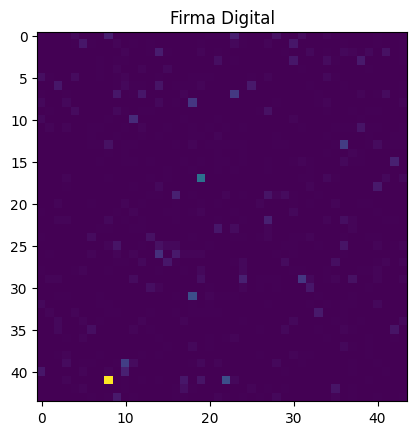

In [99]:
Matriz_Caso4 = matriz_caracteristicas # Esto nos servirá más tarde :D

import matplotlib.pyplot as plt

ejemplo_firma = matriz_caracteristicas[0] # Aquí usé el indice 0

# Reshape de la fila
dimensiones = int(len(ejemplo_firma)**0.5)
firma = ejemplo_firma[:dimensiones**2].reshape((dimensiones, dimensiones))

# Mostrar la imagen
plt.imshow(firma, interpolation='nearest')
plt.title('Firma Digital')
plt.show()


In [77]:
columnas_a_eliminar = np.all(matriz_caracteristicas == matriz_caracteristicas[0], axis=0)

nueva_matriz_caracteristicas = matriz_caracteristicas[:, ~columnas_a_eliminar]
Matriz_Caso4_2 = nueva_matriz_caracteristicas # Otra MouseKeherramienta que nos ayudará más tarde

print(nueva_matriz_caracteristicas)


[[1 0 0 ... 0 0 0]
 [0 1 0 ... 2 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


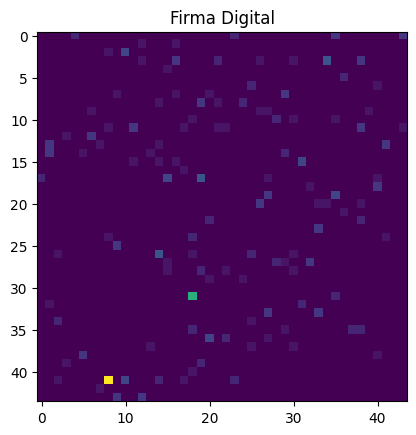

In [78]:
ejemplo_firma = nueva_matriz_caracteristicas[8] # Aquí usé el indice 8

# Reshape de la fila para que tenga una forma cuadrada
dimensiones = int(len(ejemplo_firma)**0.5)
firma = ejemplo_firma[:dimensiones**2].reshape((dimensiones, dimensiones))

# Mostrar la imagen
plt.imshow(firma, interpolation='nearest')
plt.title('Firma Digital')
plt.show()


In [79]:
# Diccionario de Pos
PoS_Count = {
    'PRON': 0,
    'VERB': 0,
    'ADJ':0,
    'ADV':0,
    'ADP':0,
    'CONJ':0,
    'INTJ':0,
    'DET':0,
    'PUNCT':0,
    'AUX':0,
}

#Tomamos el diccionario de frecuencias para tomar las palabras ya tokenizadas y contar las apariciónes
for palabra, frecuencia in frecuencias.items():
    doc = nlp_es(palabra)

    for token in doc:
        categoria = token.pos_
        if categoria in PoS_Count: # Si se encuentra en el diccionario pos
            PoS_Count[categoria] += frecuencia #Aumentar el valor de la frecuencia

In [47]:
print(PoS_Count)

{'PRON': 32, 'VERB': 1100, 'ADJ': 1840, 'ADV': 36, 'ADP': 85, 'CONJ': 0, 'INTJ': 5, 'DET': 86, 'PUNCT': 1, 'AUX': 52}


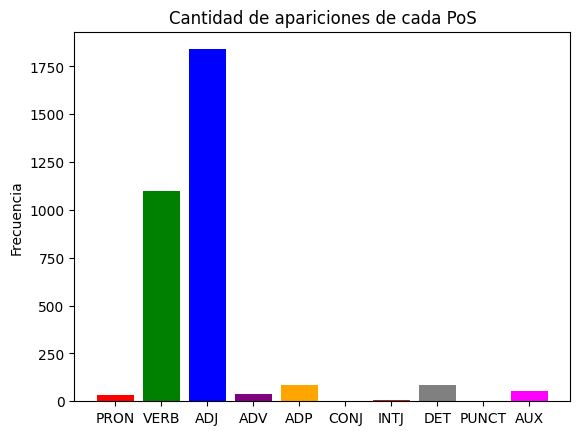

In [52]:
# Graficando los datos del diccionario de gramatica
categorias = list(PoS_Count.keys())
frecuencias = list(PoS_Count.values())
colores = ['red', 'green', 'blue', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'yellow']

plt.bar(categorias, frecuencias, color=colores)
plt.ylabel('Frecuencia')
plt.title('Cantidad de apariciones de cada PoS')
plt.show()

In [70]:
# Generar la matriz de caracteristicas
pos_tags_unicos = set()

for lista_palabras in datos.values():
    for palabra in lista_palabras:
        doc = nlp_es(palabra)
        for token in doc:
            pos_tags_unicos.add(token.pos_)

# Aquí hay magia
pos_tags_unicos = sorted(list(pos_tags_unicos))
matriz_caracteristicas = np.zeros((len(datos), len(pos_tags_unicos)))

for i, (carrera, lista_palabras) in enumerate(datos.items()):
    for palabra in lista_palabras:
        doc = nlp_es(palabra)
        for token in doc:
            pos_index = pos_tags_unicos.index(token.pos_)
            matriz_caracteristicas[i, pos_index] += 1


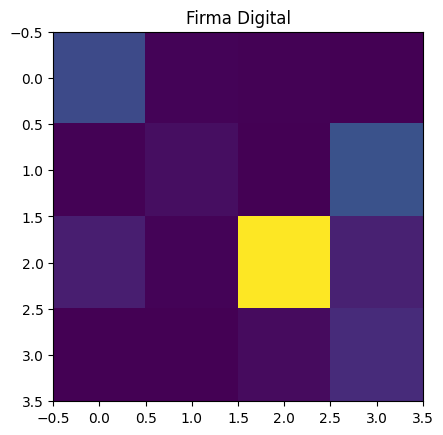

In [68]:
# La imagen o firma digital
ejemplo_firma = matriz_caracteristicas[0]

# Reshape de la fila
dimensiones = int(len(ejemplo_firma)**0.5)
firma = ejemplo_firma[:dimensiones**2].reshape((dimensiones, dimensiones))

plt.imshow(firma)
plt.title('Firma Digital')
plt.show()


# ***Conclusión del caso 3***
Primero, usar tokens a tráves de la libreria de Spacy, facilita lo tokenización del conjunto de palabras obtenidas del archivo JSON. Si tuvieramos que tokenizar con Python estándar ya que Spacy también ofrece funciones adicionales como el etiquetado POS que vi, el análisis de dependencias, la lematización,entre otras. Sobre las matrices de caracteristicas tienen muchas útilidades entre algunas de las que investigué están las técnicas de modelización de tópicos (por ejemplo, mediante LDA, Latent Dirichlet Allocation) pueden utilizarse para identificar patrones en los datos y asignar temas a los documentos. Aunque al principio no entendí por completo porqué se genera una imagen o firma, despues de investigar encontré que puede tener usos al representar el contenido de un documento o texto de una manera más compacta, y tiene sentido, sería mucho más sencillo analizar a tráves de dos firmas el parecido entre dos textos, mucho más sencillo a analizar palabra a palabra el parecido entre textos grandes, además como hicimos antes con POS también podemos notar el parecido semántico entre los textos. De esta manera puede ser útil en la detección de textos duplicados.

#***CASO 4. Reducción de dimensionalidad. (Análisis de componentes principales-PCA)***

##**Primera Matriz**

In [118]:
# Se muestra la lista convertida en ndarray
X_orig = np.array(Matriz_Caso4)

# Se elimina la columna 0 de la matriz que corresponde al identificador de la carrera
X_mod = np.delete(X_orig, 0, axis=1)

# Principal Component Analysis
from sklearn.decomposition import PCA
cantidad = 1500
# Máximo de filas realizadas
n_components = min(X_mod.shape[0], X_mod.shape[1])
random_state = 2018

pca = PCA(n_components=n_components, random_state=random_state)

X_train_PCA = pca.fit_transform(X_mod[:cantidad])


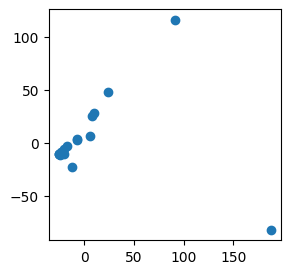

In [108]:
# Mostrar gráfica
# Observar las primeras 2 dimensiones
plt.figure(figsize=(3,3))
plt.scatter(x=X_train_PCA[:, 0], y=X_train_PCA[:, 1])
plt.show()


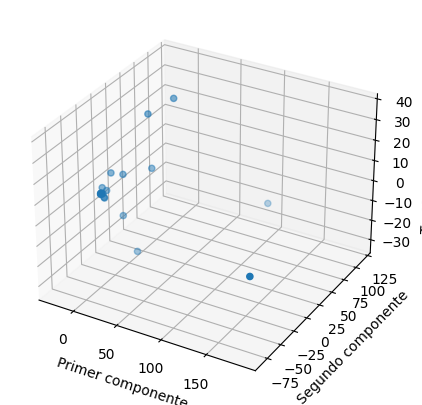

In [116]:
# Visualizar gráfico 3D
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=X_train_PCA[:, 0], ys=X_train_PCA[:, 1], zs=X_train_PCA[:, 2])

ax.set_xlabel('Primer componente')
ax.set_ylabel('Segundo componente')
ax.set_zlabel('Tercer componente')

plt.show()

##***Segunda Matriz***

In [117]:
# Se muestra la lista convertida en ndarray
X_orig = np.array(Matriz_Caso4_2)

# Se elimina la columna 0 de la matriz que corresponde al identificador de la carrera
X_mod = np.delete(X_orig, 0, axis=1)

# Principal Component Analysis
from sklearn.decomposition import PCA
cantidad = 1500
# Máximo de filas realizadas
n_components = min(X_mod.shape[0], X_mod.shape[1])
random_state = 2018

pca = PCA(n_components=n_components, random_state=random_state)

X_train_PCA = pca.fit_transform(X_mod[:cantidad])

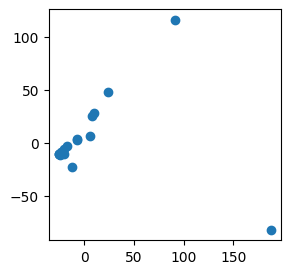

In [113]:
# Mostrar gráfica
# Observar las primeras 2 dimensiones
plt.figure(figsize=(3,3))
plt.scatter(x=X_train_PCA[:, 0], y=X_train_PCA[:, 1])
plt.show()


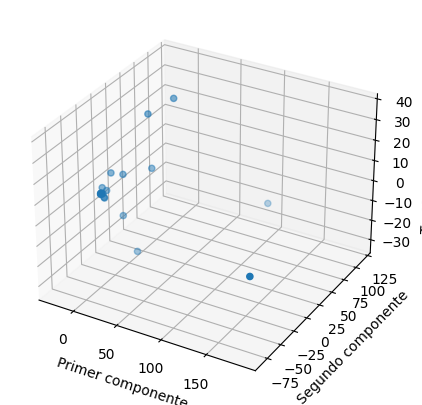

In [115]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=X_train_PCA[:, 0], ys=X_train_PCA[:, 1], zs=X_train_PCA[:, 2])

ax.set_xlabel('Primer componente')
ax.set_ylabel('Segundo componente')
ax.set_zlabel('Tercer componente')

plt.show()

#***Conclusión Caso 4 Final***
Apartir de este caso, que se centra principalmente en la reducción de dimensionalidad y la generación de gráficas en 2 y 3 dimensiones.
Tal y como el nombre menciona se encarga de reducir la cantidad de variables para pasar a tener el menor número de estas, pero manteniendo la representación de los datos, en este caso se reducen las caracteristicas de la matriz de caracteristicas. Sin embargo, no logro interpretar la información que parecen indicar las gráficas.
Como conclusión al proyecto, este es mi primer acercamiento al campo del procesamiento del lenguaje natural y aunque no creo haber obtenido resultados correctos al aplicar PCA, es una oportunidad para continuar investigando tomando como base este primer paso.